# ESPPRC cspy
This notebook is intended to test, how to use the cspy package.

In [1]:
import cspy
import networkx as nx
import numpy as np

import model

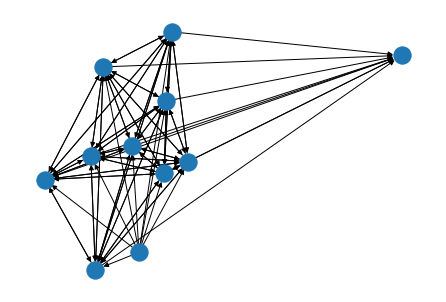

In [3]:
G = model.create_example_1().to_directed()
load = np.arange(G.number_of_nodes()-1)
G.graph['n_res'] = 2
for i in range(1,G.number_of_nodes()):
    G.add_edge("Source",i, weight=G.edges[0,i]['weight'])

G.remove_edges_from(list(G.edges(0)))   
 
for (u,v) in G.edges():
    if 0 < v <= load.size:
        G[u][v]['res_cost'] = np.array([G.nodes()[v]["demand"],0])
    else:
        G[u][v]['res_cost'] = np.array([0,0])
G = nx.relabel_nodes(G,{0:"Sink"}) 
nx.draw(G)

In [4]:
G[1][2]['res_cost']

array([5, 0])

In [5]:
G.nodes()
print(G.graph['capacity'])

20


In [6]:
alg = cspy.BiDirectional(G, [G.graph['capacity'],1], [0,0], elementary=True)
alg.run()
print(alg.path)
alg.total_cost

['Source', 8, 7, 'Sink']


11

In [7]:
G.nodes[49]
G.edges[49,"Sink"]

KeyError: 49

## parse example

In [ ]:
from parse import parse
import random, math

G = parse("Instances/E/E-n22-k4.vrp")
G = G.to_directed()

G.graph['n_res'] = 2
farkas = False
dual = [random.randint(-10,10) for i in range(G.number_of_nodes()) ]

for i in range(1,G.number_of_nodes()):
    if farkas:
        G.add_edge("Source",i, weight= 0)
    else:
        G.add_edge("Source",i, weight=G.edges[0,i]['weight'])

G.remove_edges_from(list(G.edges(0)))

for (u,v) in G.edges():
    if farkas:
        G[u][v]['weight'] = -dual[v-1]
    else:
        G[u][v]['weight'] -= dual[v-1]
    if 0 < v :
        G[u][v]['res_cost'] = np.array([G.nodes()[v]["demand"],1])
    else:
        G[u][v]['res_cost'] = np.array([1,1])

G = nx.relabel_nodes(G,{0:"Sink"})

# Hierfür gibt es keinen Fehler. 
# alg = cspy.BiDirectional(G, [math.ceil(G.graph['capacity'] +1 /2),G.graph['capacity'] + 1], [math.ceil(G.graph['capacity'] +1 /2)-1,0], elementary=False,direction='both')
lg = cspy.BiDirectional(G, [G.graph['capacity'] +1,G.graph['capacity'] + 1], [0,0], elementary=False,direction='both')
alg.run()
path  = tuple( 0 if node == "Source" or node == "Sink" else node for node in alg.path)
print(path)
alg.consumed_resources

PARSE: Minimum number of trucks is 4
